<a href="https://colab.research.google.com/github/cyuancheng/Stock_Prediction/blob/master/ETF_QQQ_POC_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TA Package

print('Installing TA...')
!pip install ta

Installing TA...
  Stored in directory: /root/.cache/pip/wheels/de/ac/09/28855b628633d42061f670c59df6877a1dbdf70d04c985bc18
Successfully built ta


### Import Packages

In [2]:
import datetime as dt
import ta
import os


import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import Normalizer, normalize, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout
from keras.metrics import categorical_accuracy
from keras.utils import to_categorical
 

%matplotlib inline

Using TensorFlow backend.


### Load Transform Script


In [3]:
# Upload Transform script from local file

from google.colab import files
uploaded = files.upload()

Saving TransformData.py to TransformData.py


In [0]:
from sklearn.pipeline import Pipeline
from TransformData import Normalizer, PCA_, GetTA

### Load QQQ file 

In [5]:
# Upload QQQ file

from google.colab import files
uploaded = files.upload()

Saving AlphaVantageDaily_adjusted_qqq.csv to AlphaVantageDaily_adjusted_qqq.csv


In [6]:
etf = pd.read_csv('AlphaVantageDaily_adjusted_qqq.csv', infer_datetime_format=True,  index_col=['timestamp'])
etf.sort_index(inplace=True)
etf.tail(10)

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
timestamp,,,,,,,,
2019-06-14,182.44,183.11,181.9400,182.64,182.2375,22844089,0.0000,1.0
2019-06-17,183.01,184.25,182.8350,183.74,183.3351,20379476,0.0000,1.0
2019-06-18,185.88,187.72,185.4291,186.41,185.9992,48177301,0.0000,1.0
2019-06-19,186.73,187.53,185.5700,187.11,186.6976,31672855,0.0000,1.0
2019-06-20,189.72,189.76,187.1585,188.85,188.4338,40921964,0.0000,1.0
2019-06-21,188.57,189.77,188.1736,188.57,188.1544,39980418,0.0000,1.0
2019-06-24,188.52,188.72,188.0600,188.16,188.1600,19375205,0.4156,1.0
2019-06-25,188.06,188.14,184.6500,184.93,184.9300,33921112,0.0000,1.0
2019-06-26,186.13,187.33,185.4900,185.79,185.7900,22512628,0.0000,1.0


In [7]:
print('First Record:', etf.index.min())
print('Last Record:', etf.index.max())
print('Number of Records:', len(etf))

First Record: 1999-03-10
Last Record: 2019-06-27
Number of Records: 5109


In [13]:
etf.describe()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5.109000e+03,5109.000000,5109.000000
mean,74.386994,75.014152,73.653193,74.370472,66.478464,6.996211e+07,0.002143,1.000196
std,44.939833,45.244975,44.560793,44.954194,42.465513,5.292414e+07,0.024365,0.013990
min,19.940000,20.530000,19.760000,20.060000,17.677800,1.097837e+06,0.000000,1.000000
25%,39.390000,39.685000,39.000000,39.350000,35.073700,3.017664e+07,0.000000,1.000000
50%,55.380000,55.870000,54.790000,55.380000,48.967100,6.009376e+07,0.000000,1.000000
75%,105.290000,105.919900,104.210000,105.120000,90.140900,9.444580e+07,0.000000,1.000000
max,229.800000,232.900000,227.000000,230.000000,190.688800,6.165787e+08,0.420600,2.000000


In [42]:
# check nan data
etf['adjusted_close'].isnull().sum()

0

In [0]:
hi_lo = etf_snap.high-etf.low

In [0]:
# convert index from string to timestamp
etf.index = pd.to_datetime(etf.index)

### Stock Chart

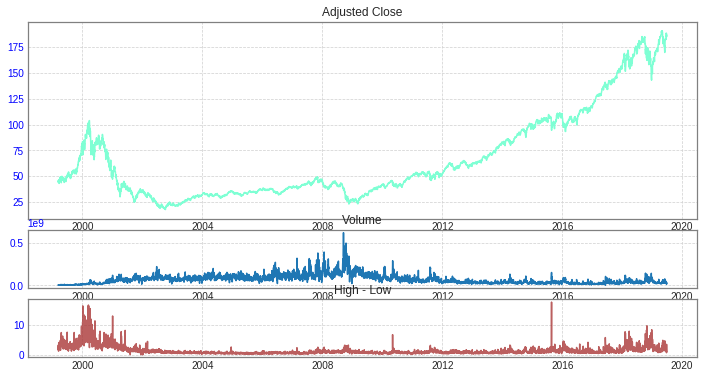

In [35]:

# Daily Charts

spine_color = '#808080'
grid_color = '#D3D3D3'

# filter dates to select snapshot 
#start_date = etf.index.min()
#end_date = etf.index.max()
#etf_snap = etf.loc[start_date:end_date]
etf_snap = etf.loc['1999-03-10':'2019-06-27']

hi_lo = etf_snap.high - etf.low

fig = plt.figure(figsize=(12,10))
plt.style.use('seaborn-white')


ax1 = plt.subplot2grid((8,1), (0,0), rowspan=3, colspan=1) 
ax2 = plt.subplot2grid((8,1), (3,0), rowspan=1, colspan=1, sharex=ax1) 
ax3 = plt.subplot2grid((8,1), (4,0), rowspan=1, colspan=1, sharex=ax1) 

#ax1 = plt.subplot2grid((3,1), (0,0), rowspan=1, colspan=3)
ax1.plot(etf_snap.index, etf_snap.adjusted_close.dropna(), color='aquamarine')
ax1.axes.get_xaxis().set_visible(True)
ax1.set_ylabel('', color = 'black')
ax1.set_title('Adjusted Close')

ax1.spines['bottom'].set_color(spine_color)
ax1.spines['top'].set_color(spine_color)
ax1.spines['left'].set_color(spine_color)
ax1.spines['right'].set_color(spine_color)

ax1.grid(True, color=grid_color, lw = 0.75, ls ='--')
ax1.tick_params(axis='y', colors='b')

#ax2 = plt.subplot2grid((3,1), (1,0), rowspan=1, colspan=3)
ax2.plot(etf_snap.index, etf_snap.volume.dropna())
ax2.axes.get_xaxis().set_visible(True)
ax2.set_ylabel('', color = 'black')
ax2.set_title('Volume')

ax2.spines['bottom'].set_color(spine_color)
ax2.spines['top'].set_color(spine_color)
ax2.spines['left'].set_color(spine_color)
ax2.spines['right'].set_color(spine_color)

ax2.grid(True, color=grid_color, lw = 0.75, ls ='--')
ax2.tick_params(axis='y', colors='b')

    
#ax3 = plt.subplot2grid((3,1), (2,0), rowspan=1, colspan=3)
ax3.plot(etf_snap.index, hi_lo.dropna(), color='brown', alpha=.75, ls='-')
ax3.axes.get_xaxis().set_visible(True)
ax3.set_ylabel('', color = 'black')
ax3.set_title('High - Low')

ax3.spines['bottom'].set_color(spine_color)
ax3.spines['top'].set_color(spine_color)
ax3.spines['left'].set_color(spine_color)
ax3.spines['right'].set_color(spine_color)

ax3.grid(True, color=grid_color, lw = 0.75, ls ='--')
ax3.tick_params(axis='y', colors='b')



In [0]:
# Retrieve TAs, Normalize Data, Run PCA

pipe = Pipeline([('etf_ta',GetTA()),('normalizing',Normalizer()),('pca',PCA_(0.9))])

In [37]:
# Top Principal Components

etf_pca = pipe.fit_transform(etf)

print(etf_pca.shape)


/usr/local/lib/python3.6/dist-packages/ta/trend.py:170: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ta/trend.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ta/trend.py:174: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ta/trend.py:174: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ta/trend.py:176: RuntimeWarning:

invalid value encountered in subtract



(5109, 24)


In [39]:
etf_pca.tail()

,OriginalData_0,OriginalData_1,Volume_0,Volume_1,Volume_2,Volume_3,Volume_4,Volatility_0,Volatility_1,Volatility_2,Volatility_3,Volatility_4,Trend_0,Trend_1,Trend_2,Trend_3,Trend_4,Trend_5,Trend_6,Momentum_0,Momentum_1,Momentum_2,Others_0,Others_1
timestamp,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-21,0.041027,-0.008018,-0.000605,0.013688,-0.020272,0.009624,-0.042009,0.049201,0.002420,-0.007611,0.002881,-0.002708,0.022572,-0.030759,-0.046616,0.009591,-0.003326,0.006077,0.003132,-0.016204,0.008625,-0.009138,0.000857,0.030288
2019-06-24,0.081197,0.226276,0.003544,0.013508,-0.020702,0.012119,-0.041258,0.049096,0.002347,-0.007580,0.002702,-0.002956,0.022124,-0.023284,-0.045776,0.003549,-0.010366,0.013235,-0.000536,-0.017048,0.005777,-0.010186,0.001548,0.030199
2019-06-25,0.040478,-0.007935,0.006007,0.013374,-0.019735,0.014631,-0.041164,0.049334,0.002399,-0.007595,0.002794,-0.002831,0.018787,-0.012543,-0.044156,0.000872,-0.012685,0.015172,-0.006310,-0.011786,-0.002439,-0.010081,0.016553,0.029774
2019-06-26,0.041063,-0.008043,0.007949,0.016235,-0.019042,0.009129,-0.041977,0.049456,0.002403,-0.007592,0.002776,-0.002858,0.019235,-0.008911,-0.043559,0.001095,-0.011265,0.013400,-0.006670,-0.011338,-0.003150,-0.009871,-0.005216,0.029376
2019-06-27,0.041568,-0.008132,0.002954,0.020112,-0.017458,0.002719,-0.042201,0.049402,0.002352,-0.007570,0.002646,-0.003038,0.020693,-0.008321,-0.042927,0.005310,-0.007136,0.008273,-0.006502,-0.009657,-0.004408,-0.008870,-0.005576,0.029613


### Create Model Data/Calculate Y

* cumulative return over a period
* 14-day ema /50-day ema cross-overs


In [43]:
price_change = etf.adjusted_close/etf.adjusted_close.shift(1) -1  # adj. close change per day
price_change.describe()

count    5108.000000
mean        0.000431
std         0.017490
min        -0.092865
25%        -0.006582
50%         0.000970
75%         0.007949
max         0.168412
Name: adjusted_close, dtype: float64

In [44]:
price_change.tail()

timestamp
2019-06-21   -0.001483
2019-06-24    0.000030
2019-06-25   -0.017166
2019-06-26    0.004650
2019-06-27    0.005006
Name: adjusted_close, dtype: float64

Text(0.5, 1.0, 'Price Change')

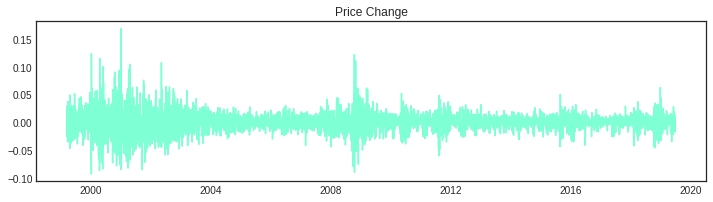

In [45]:
# plot
spine_color = '#808080'
grid_color = '#D3D3D3'

fig = plt.figure(figsize=(12,10))
plt.style.use('seaborn-white')

ax1 = plt.subplot2grid((3,1), (0,0), rowspan=1, colspan=3)
ax1.plot(price_change,color='aquamarine')
ax1.axes.get_xaxis().set_visible(True)
ax1.set_ylabel('', color = 'black')
ax1.set_title('Price Change')

In [0]:
# 

def xdata(data, lookback):
    
  return data[lookback:]
  
  

def ydata(data, long, short, lookback, window, threshold=0.03):
  
  '''
  threshold=0.03 ~ 2 x standard deviation
  
  '''
  
  print('Caulcated Price Change in', window,' period and {}/{}-Day Cross-Overs'.format(short, long))
  print('Look back:', lookback, 'Window: ', window,' Short: ', short, 'Long:', long)
  
  if window > long:
    window=long
  
  ema_short = data.adjusted_close.ewm(span=short).mean() # moving average
  ema_long  = data.adjusted_close.ewm(span=long).mean()
  #print((ema_short/ema_long).describe())
  
  #price_rise = np.where(data.adjusted_close/data.adjusted_close.shift(window) - 1 < -threshold, 1,
  #                      np.where(data.adjusted_close/data.adjusted_close.shift(window) - 1 > threshold, 2, 0))
  
  rise = data.adjusted_close/data.adjusted_close.shift(window) - 1 # price change within window
  cross = ema_short/ema_long  # find 
  
  cross_over = np.where(cross - 1 > threshold, 2, np.where(cross - 1 < -threshold, 1, 0))
  price_rise = np.where(rise < -threshold, 1, np.where(rise > threshold, 2, 0))
  
  y = pd.DataFrame()
  y['price_rise'] = price_rise
  y['cross_over'] = cross_over
  y['adj_close']  =data.adjusted_close.values
  #y['cross'] = cross.values
  #y['rise'] = rise.values
  
  print(y.groupby('price_rise').count())
  print(y.groupby('cross_over').count())
  
  return y
  

In [0]:

window = 3
long = 50
short = 14
lookback=50

y_label = ydata(etf, long, short, lookback, window, 0.025)
print(len(y_label), y_label.shape)
print(y_label.head(15))


Caulcated Price Change in 3  period and 14/50-Day Cross-Overs
Look back: 50 Window:  3  Short:  14 Long: 50
            cross_over  adj_close
price_rise                       
0                 3636       3636
1                  567        567
2                  598        598
            price_rise  adj_close
cross_over                       
0                 3203       3203
1                  639        639
2                  959        959
4801 (4801, 3)
    price_rise  cross_over  adj_close
0            0           0    35.6037
1            0           0    36.9159
2            0           0    37.2819
3            2           0    37.8893
4            2           0    39.8712
5            2           0    39.7154
6            2           0    40.1048
7            0           0    40.1437
8            0           0    40.0659
9            0           0    40.7667
10           0           0    39.5597
11           0           0    40.0659
12           0           0    39.8712
13   

In [0]:
etf_pca.shape

(4801, 23)

### Create Sequences

In [0]:


def create_sequence(data,lookback, window):
  
    xseq = []
    
    for i in range(lookback, data.shape[0]):
      
      if i+ window < data.shape[0]:
        xseq.append(np.array(data.iloc[i-window:i]))
    
    print('Created Sequences: length = ', len(xseq) )
    return np.array(xseq)
  
  
def split_data(data, sr):
  
  # sr = sampling rate
  
  cut = np.int(sr*len(data))
  
  test = data[-(len(data)-cut):]
  train = data[:cut]
  
  print('Train Samples:', len(train))
  print('Test Samples:' , len(test))
      
  return train, test 


def build_model_data(x, y, lookback, window):
  
  xs = create_sequence(x, lookback, window)
  ys = y.iloc[lookback+window:lookback+window+len(xs)].to_numpy()

  ys_pr = ys[:,0].reshape(len(ys),1)
  ys_co = ys[:,1].reshape(len(ys),1)
  ys_ac = ys[:,2].reshape(len(ys),1)
  
  print('Sequence Data:', xs.shape, ys_pr.shape, ys_co.shape)
  
  return xs, ys_pr, ys_co, ys_ac


def split_train_test(x,y,sr):
  
  # sr = sampling rate for Training set
  
  train_x, test_x = split_data(x,0.9)
  train_y, test_y = split_data(y,0.9)

  train_yc = to_categorical(train_y)
  test_yc = to_categorical(test_y)
  #print(test_yc.shape)
  
  train_x = train_x.reshape((train_x.shape[0], train_x.shape[1],train_x.shape[2]))
  train_yc = train_yc.reshape((train_yc.shape[0], train_yc.shape[1]))
  
  test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2]))
  test_yc = test_yc.reshape((test_yc.shape[0], test_yc.shape[1]))
  
  print('Train/Test -X:', train_x.shape, test_x.shape)
  print('Train/Test -Y:', train_yc.shape, test_yc.shape)
  
  
  return train_x, test_x, train_yc, test_yc



In [0]:
y_label[55:70]

,price_rise,cross_over,adj_close
55,0,0,39.6600
56,0,0,39.8938
57,0,0,40.2444
58,0,0,40.1665
59,0,0,40.3223
60,0,0,40.2444
61,0,0,40.2054
62,0,0,40.7898
63,0,0,40.9457
64,0,0,41.0236


###Model Building - 50-Days Timesteps

In [0]:
# Create Sequences and Split to Train and Test
# Split into Train and Test
# Timesteps = 50 days


window = 3
long = 50
short = 14
lookback=50

Xs, Ypr, Yco, Yac =  build_model_data(etf_pca, y_label, lookback, window)
train_x, test_x, train_y, test_y = split_train_test(Xs,Yco,0.9)

Created Sequences: length =  4748
Sequence Data: (4748, 3, 23) (4748, 1) (4748, 1)
Train Samples: 4273
Test Samples: 475
Train Samples: 4273
Test Samples: 475
Train/Test -X: (4273, 3, 23) (475, 3, 23)
Train/Test -Y: (4273, 3) (475, 3)


In [0]:


# LSTM network design for Classification prediction
# Timesteps = 50 days

model = Sequential()
model.add(LSTM(72, return_sequences= True, kernel_initializer='uniform', input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.25))
model.add(LSTM(48, return_sequences= True, kernel_initializer='uniform'))
model.add(Dropout(0.25))
model.add(LSTM(24, return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
#model.add(Dense(1))
#model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit network
epoch_history = model.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(test_x, test_y), verbose=2, shuffle=False)

model.evaluate(test_x,test_y)


W0713 11:02:10.008611 139888686638976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 11:02:10.024862 139888686638976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 11:02:10.027078 139888686638976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 11:02:10.214745 139888686638976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0713 11:02:10.222856 

Train on 4273 samples, validate on 475 samples
Epoch 1/50
 - 5s - loss: 0.9783 - acc: 0.6459 - val_loss: 0.7248 - val_acc: 0.7579
Epoch 2/50
 - 2s - loss: 0.9206 - acc: 0.6529 - val_loss: 0.7269 - val_acc: 0.7579
Epoch 3/50
 - 3s - loss: 0.9094 - acc: 0.6529 - val_loss: 0.7272 - val_acc: 0.7579
Epoch 4/50
 - 3s - loss: 0.9029 - acc: 0.6529 - val_loss: 0.7268 - val_acc: 0.7579
Epoch 5/50
 - 2s - loss: 0.8960 - acc: 0.6529 - val_loss: 0.7247 - val_acc: 0.7579
Epoch 6/50
 - 3s - loss: 0.8861 - acc: 0.6529 - val_loss: 0.7194 - val_acc: 0.7579
Epoch 7/50
 - 4s - loss: 0.8688 - acc: 0.6513 - val_loss: 0.6883 - val_acc: 0.7579
Epoch 8/50
 - 4s - loss: 0.7937 - acc: 0.6597 - val_loss: 0.5451 - val_acc: 0.7811
Epoch 9/50
 - 3s - loss: 0.6998 - acc: 0.6857 - val_loss: 0.4445 - val_acc: 0.8105
Epoch 10/50
 - 3s - loss: 0.6425 - acc: 0.6937 - val_loss: 0.4118 - val_acc: 0.8168
Epoch 11/50
 - 3s - loss: 0.5944 - acc: 0.7185 - val_loss: 0.3640 - val_acc: 0.8274
Epoch 12/50
 - 3s - loss: 0.5487 - acc

[0.21230251116187948, 0.92]

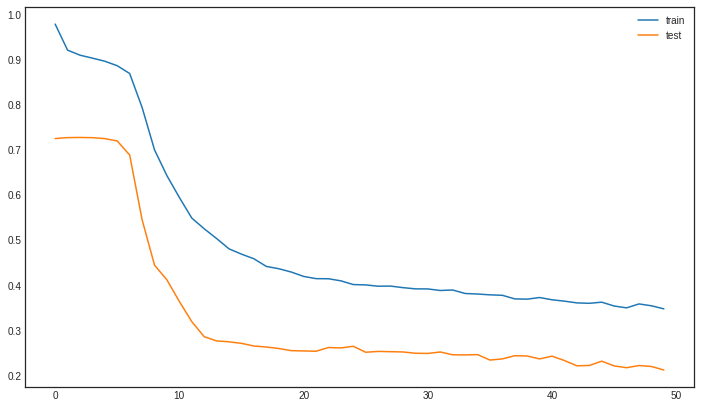

In [0]:

# Loss History Chart

spine_color = '#808080'
grid_color = '#D3D3D3'

fig = plt.figure(figsize=(12,7))

plt.style.use('seaborn-white')

# plot history
plt.plot(epoch_history.history['loss'], label='train')
plt.plot(epoch_history.history['val_loss'], label='test')
plt.legend()


In [0]:
# Model Evaluation - Confusion Matrix


y_pred = model.predict(test_x)
matrix_50 = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
y_pred_50 = y_pred
matrix_50


array([[353,   1,   6],
       [ 13,  50,   0],
       [ 18,   0,  34]])

### Model Building - 20-Days TimeSteps

In [0]:
# Create Sequences and Split to Train and Test
# Split into Train and Test
# Timesteps = 20 days


window = 3
long = 50
short = 14
lookback=20

Xs, Ypr, Yco, Yac =  build_model_data(etf_pca, y_label, lookback, window)
train_x, test_x, train_y, test_y = split_train_test(Xs,Yco,0.9)

Created Sequences: length =  4778
Sequence Data: (4778, 3, 23) (4778, 1) (4778, 1)
Train Samples: 4300
Test Samples: 478
Train Samples: 4300
Test Samples: 478
Train/Test -X: (4300, 3, 23) (478, 3, 23)
Train/Test -Y: (4300, 3) (478, 3)


In [0]:
# LSTM network design for Classification prediction
# Timesteps = 20 days

model = Sequential()
model.add(LSTM(72, return_sequences= True, kernel_initializer='uniform', input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.25))
model.add(LSTM(48, return_sequences= True, kernel_initializer='uniform'))
model.add(Dropout(0.25))
model.add(LSTM(24, return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
#model.add(Dense(1))
#model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit network
epoch_history = model.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(test_x, test_y), verbose=2, shuffle=False)

model.evaluate(test_x,test_y)

Train on 4300 samples, validate on 478 samples
Epoch 1/50
 - 5s - loss: 0.9752 - acc: 0.6498 - val_loss: 0.7259 - val_acc: 0.7594
Epoch 2/50
 - 3s - loss: 0.9140 - acc: 0.6551 - val_loss: 0.7210 - val_acc: 0.7594
Epoch 3/50
 - 3s - loss: 0.9054 - acc: 0.6551 - val_loss: 0.7229 - val_acc: 0.7594
Epoch 4/50
 - 3s - loss: 0.9014 - acc: 0.6551 - val_loss: 0.7233 - val_acc: 0.7594
Epoch 5/50
 - 3s - loss: 0.8937 - acc: 0.6551 - val_loss: 0.7223 - val_acc: 0.7594
Epoch 6/50
 - 3s - loss: 0.8886 - acc: 0.6551 - val_loss: 0.7202 - val_acc: 0.7594
Epoch 7/50
 - 3s - loss: 0.8840 - acc: 0.6551 - val_loss: 0.7198 - val_acc: 0.7594
Epoch 8/50
 - 3s - loss: 0.8748 - acc: 0.6537 - val_loss: 0.7276 - val_acc: 0.7594
Epoch 9/50
 - 3s - loss: 0.8614 - acc: 0.6519 - val_loss: 0.7354 - val_acc: 0.7594
Epoch 10/50
 - 3s - loss: 0.8409 - acc: 0.6528 - val_loss: 0.7426 - val_acc: 0.7594
Epoch 11/50
 - 3s - loss: 0.8055 - acc: 0.6707 - val_loss: 0.7319 - val_acc: 0.7678
Epoch 12/50
 - 3s - loss: 0.7630 - acc

[0.219314228415988, 0.9037656903765691]

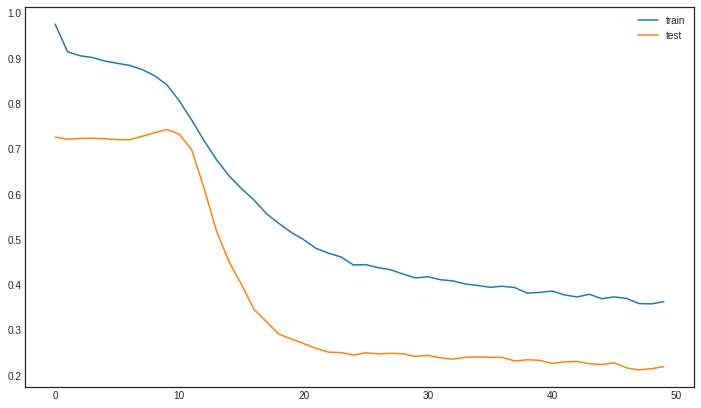

In [0]:
# Loss History Chart

spine_color = '#808080'
grid_color = '#D3D3D3'

fig = plt.figure(figsize=(12,7))

plt.style.use('seaborn-white')

# plot history
plt.plot(epoch_history.history['loss'], label='train')
plt.plot(epoch_history.history['val_loss'], label='test')
plt.legend()


In [0]:
# Model Evaluation - Confusion Matrix


y_pred = model.predict(test_x)
matrix_20 = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
y_pred_20 = y_pred
matrix_20


array([[353,   1,   9],
       [ 21,  42,   0],
       [ 15,   0,  37]])

### Model Building - 14-Days Timesteps

In [0]:
# Create Sequences and Split to Train and Test
# Split into Train and Test
# Timesteps = 14 days


window = 5
long = 50
short = 14
lookback= 14

Xs, Ypr, Yco, Yac =  build_model_data(etf_pca, y_label, lookback, window)
train_x, test_x, train_y, test_y = split_train_test(Xs,Yco,0.9)

Created Sequences: length =  4782
Sequence Data: (4782, 5, 23) (4782, 1) (4782, 1)
Train Samples: 4303
Test Samples: 479
Train Samples: 4303
Test Samples: 479
Train/Test -X: (4303, 5, 23) (479, 5, 23)
Train/Test -Y: (4303, 3) (479, 3)


In [0]:
# LSTM network design for Classification prediction
# Timesteps = 14 days

model = Sequential()
model.add(LSTM(72, return_sequences= True, kernel_initializer='uniform', input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.25))
model.add(LSTM(48, return_sequences= True, kernel_initializer='uniform'))
model.add(Dropout(0.25))
model.add(LSTM(24, return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
#model.add(Dense(1))
#model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit network
epoch_history = model.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(test_x, test_y), verbose=2, shuffle=False)

model.evaluate(test_x,test_y)

Train on 4303 samples, validate on 479 samples
Epoch 1/50
 - 12s - loss: 0.9669 - acc: 0.6507 - val_loss: 0.7306 - val_acc: 0.7599
Epoch 2/50
 - 4s - loss: 0.9106 - acc: 0.6554 - val_loss: 0.7231 - val_acc: 0.7599
Epoch 3/50
 - 4s - loss: 0.9025 - acc: 0.6554 - val_loss: 0.7198 - val_acc: 0.7599
Epoch 4/50
 - 4s - loss: 0.8923 - acc: 0.6554 - val_loss: 0.7146 - val_acc: 0.7599
Epoch 5/50
 - 5s - loss: 0.8815 - acc: 0.6537 - val_loss: 0.7032 - val_acc: 0.7599
Epoch 6/50
 - 5s - loss: 0.8580 - acc: 0.6472 - val_loss: 0.6560 - val_acc: 0.7662
Epoch 7/50
 - 4s - loss: 0.7962 - acc: 0.6686 - val_loss: 0.6347 - val_acc: 0.7808
Epoch 8/50
 - 4s - loss: 0.7540 - acc: 0.6758 - val_loss: 0.5726 - val_acc: 0.8079
Epoch 9/50
 - 4s - loss: 0.7209 - acc: 0.6856 - val_loss: 0.5194 - val_acc: 0.8163
Epoch 10/50
 - 4s - loss: 0.6946 - acc: 0.6858 - val_loss: 0.4825 - val_acc: 0.8288
Epoch 11/50
 - 4s - loss: 0.6723 - acc: 0.6798 - val_loss: 0.4545 - val_acc: 0.8351
Epoch 12/50
 - 4s - loss: 0.6483 - ac

[0.2762113334708274, 0.8705636743215032]

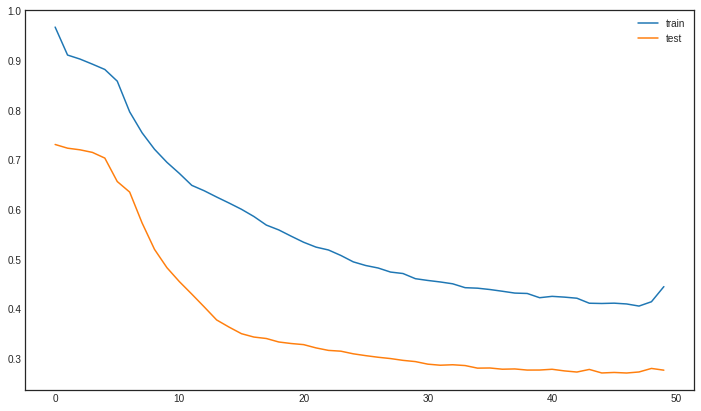

In [0]:
# Loss History Chart

spine_color = '#808080'
grid_color = '#D3D3D3'

fig = plt.figure(figsize=(12,7))

plt.style.use('seaborn-white')

# plot history
plt.plot(epoch_history.history['loss'], label='train')
plt.plot(epoch_history.history['val_loss'], label='test')
plt.legend()


In [0]:
# Model Evaluation - Confusion Matrix


y_pred = model.predict(test_x)
matrix_14 = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
y_pred_14 = y_pred
matrix_14


array([[352,   2,  10],
       [ 24,  39,   0],
       [ 26,   0,  26]])

### Computing Strategy Returns